<img src="https://drive.google.com/uc?export=view&id=1wYSMgJtARFdvTt5g7E20mE4NmwUFUuog" width="200">

[![Gen AI Experiments](https://img.shields.io/badge/Gen%20AI%20Experiments-GenAI%20Bootcamp-blue?style=for-the-badge&logo=artificial-intelligence)](https://github.com/buildfastwithai/gen-ai-experiments)
[![Gen AI Experiments GitHub](https://img.shields.io/github/stars/buildfastwithai/gen-ai-experiments?style=for-the-badge&logo=github&color=gold)](http://github.com/buildfastwithai/gen-ai-experiments)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1O_TSfVigMOWVAqPpAyuVitIpvvl8fGFG?usp=sharing)



## Master Generative AI in 8 Weeks
**What You'll Learn:**
- Master cutting-edge AI tools & frameworks
- 6 weeks of hands-on, project-based learning
- Weekly live mentorship sessions
- Join Innovation Community

Learn by building. Get expert mentorship and work on real AI projects.
[Start Your Journey](https://www.buildfastwithai.com/genai-course)


### **🧠 LangGraph Supervisor**

The `langgraph-supervisor` is a Python library that facilitates the creation of hierarchical multi-agent systems using LangGraph.  
In such systems, specialized agents are coordinated by a central **supervisor agent**, which manages communication flow and task delegation based on context and requirements.

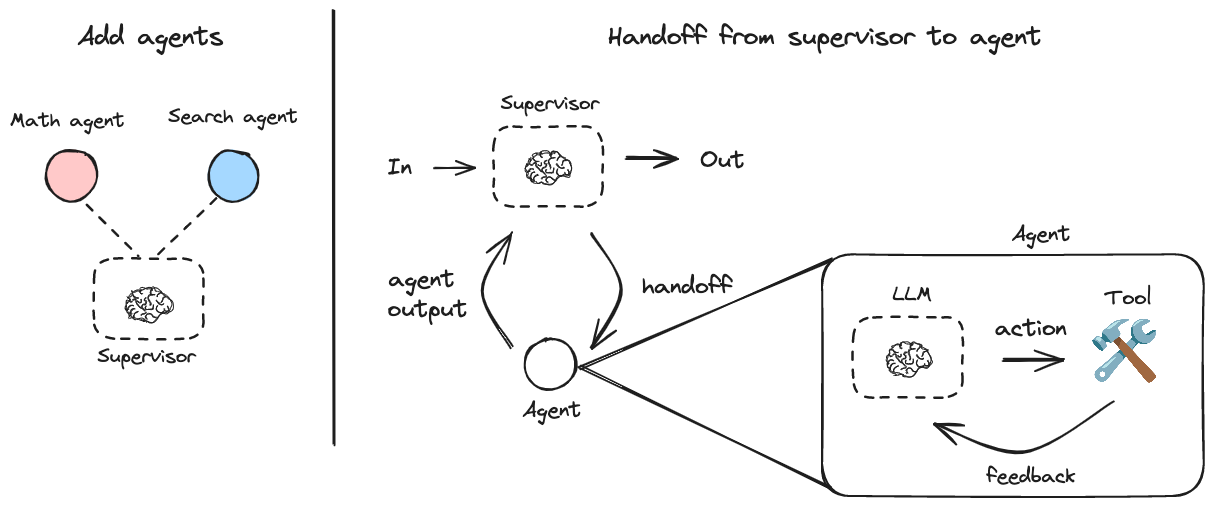

#### 🚀 Key Features:
- **👨‍💼 Supervisor Agent** – Orchestrates multiple specialized agents, directing tasks and managing workflows.
- **🔄 Agent Communication** – Utilizes a tool-based handoff mechanism for efficient communication between agents.
- **📝 Message History Management** – Offers flexible control over conversation histories for dynamic interaction.

### **📦 Dependency Installation**  



In [ ]:
pip install langgraph-supervisor langchain-openai

### **🔑 Setup API Keys**








In [ ]:
from google.colab import userdata
import os

os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

### **📥 Import Required Libraries**








In [ ]:
from langchain_openai import ChatOpenAI
from langgraph_supervisor import create_supervisor
from langgraph.prebuilt import create_react_agent

### 🚀**Model Initialization**

In [ ]:
model = ChatOpenAI(model="gpt-4o")

### 🔧 **Defining Functions**








In [ ]:
def add(a: float, b: float) -> float:
    """Add two numbers."""
    return a + b

def multiply(a: float, b: float) -> float:
    """Multiply two numbers."""
    return a * b

def web_search(query: str) -> str:
    """Search the web for information."""
    return (
        "Here are the headcounts for each of the FAANG companies in 2024:\n"
        "1. **Facebook (Meta)**: 67,317 employees.\n"
        "2. **Apple**: 164,000 employees.\n"
        "3. **Amazon**: 1,551,000 employees.\n"
        "4. **Netflix**: 14,000 employees.\n"
        "5. **Google (Alphabet)**: 181,269 employees."
    )

### **🤖 Creating AI Agents for Math & Research**








In [ ]:
math_agent = create_react_agent(
    model=model,
    tools=[add, multiply],
    name="math_expert",
    prompt="You are a math expert. Always use one tool at a time."
)

research_agent = create_react_agent(
    model=model,
    tools=[web_search],
    name="research_expert",
    prompt="You are a world class researcher with access to web search. Do not do any math."
)

### 🏗️ **Creating Supervisor Workflow**


In [ ]:
workflow = create_supervisor(
    [research_agent, math_agent],
    model=model,
    prompt=(
        "You are a team supervisor managing a research expert and a math expert. "
        "For current events, use research_agent. "
        "For math problems, use math_agent."
    )
)


###**🚀 Compiling and Running the Workflow**








In [ ]:
app = workflow.compile()
result = app.invoke({
    "messages": [
        {
            "role": "user",
            "content": "what's the combined headcount of the FAANG companies in 2024?"
        }
    ]
})

In [ ]:
for m in result["messages"]:
    m.pretty_print()

================================ Human Message =================================

what's the combined headcount of the FAANG companies in 2024?
================================== Ai Message ==================================
Name: supervisor
Tool Calls:
  transfer_to_research_expert (call_j0XPTTYdtSxxdWIMx4xfEi5G)
 Call ID: call_j0XPTTYdtSxxdWIMx4xfEi5G
  Args:
================================= Tool Message =================================
Name: transfer_to_research_expert

Successfully transferred to research_expert
================================== Ai Message ==================================
Name: research_expert

Here are the headcounts for each of the FAANG companies in 2024:

1. **Facebook (Meta)**: 67,317 employees
2. **Apple**: 164,000 employees
3. **Amazon**: 1,551,000 employees
4. **Netflix**: 14,000 employees
5. **Google (Alphabet)**: 181,269 employees

To get the total headcount, you would need to sum these individual headcounts.
================================== Ai Mes

###**🧠 Adding Memory to Supervisor Workflow**

In [ ]:
from langgraph.checkpoint.memory import InMemorySaver
from langgraph.store.memory import InMemoryStore

###**🛠️ Initialize Checkpointer and Store**

In [ ]:
checkpointer = InMemorySaver()
store = InMemoryStore()

###**🔧 Define Tools for Agents**

In [ ]:
def scrape_website(url):
    """Simulated website scraping tool returning dummy content."""
    dummy_content = {
        "https://example.com": "Example site with info: 500 employees",
        "https://another.com": "Another site with data: 300 units sold"
    }
    return dummy_content.get(url, "No data found for this URL")

def calculator(expression):
    """Simple calculator evaluating basic arithmetic expressions."""
    try:
        return eval(expression, {"__builtins__": {}})
    except Exception as e:
        return f"Error evaluating expression: {str(e)}"

def square_root(x):
    """Calculate the square root of a number."""
    try:
        return float(x) ** 0.5
    except ValueError:
        return "Error: Input must be a non-negative number"

###**🔍 Create Research Agent**

In [ ]:
research_agent = create_react_agent(
    model=model,
    tools=[scrape_website],
    name="research_expert",
    prompt="You are a research expert. Use scrape_website to gather data from websites, but do not perform calculations."
)

###**➕ Create Math Agent**

In [ ]:
math_agent = create_react_agent(
    model=model,
    tools=[calculator, square_root],
    name="math_expert",
    prompt="You are a math expert. Perform calculations using one tool at a time (calculator for basic ops, square_root for roots)."
)

### 🏗️ **Creating Supervisor Workflow**


In [ ]:
workflow = create_supervisor(
    [research_agent, math_agent],
    model=model,
    prompt="You are a team supervisor managing a research expert and a math expert."
)

###**🚀 Compiling and Running the Workflow**








In [ ]:
app = workflow.compile(
    checkpointer=checkpointer,
    store=store
)

config = {"configurable": {"thread_id": "task_001"}}

result = app.invoke({
    "messages": [
        {
            "role": "user",
            "content": "Scrape https://example.com for employee count and calculate the square root of that number."
        }
    ]
}, config=config)

In [ ]:
for m in result["messages"]:
    m.pretty_print()

###**🧠 Checking Memory**

In [ ]:
result = app.invoke({
    "messages": [
        {
            "role": "user",
            "content": "what was my previous question?"
        }
    ]
}, config=config)

In [ ]:
for m in result["messages"]:
    m.pretty_print()

###**🛠️ Using Functional API**

In [ ]:
from langgraph.prebuilt import create_react_agent
from langgraph_supervisor import create_supervisor

from langchain_openai import ChatOpenAI

from langgraph.func import entrypoint, task
from langgraph.graph import add_messages

model = ChatOpenAI(model="gpt-4o")

@task
def generate_joke(messages):
    """First LLM call to generate initial joke"""
    system_message = {
        "role": "system",
        "content": "Write a short joke"
    }
    msg = model.invoke(
        [system_message] + messages
    )
    return msg

@entrypoint()
def joke_agent(state):
    joke = generate_joke(state['messages']).result()
    messages = add_messages(state["messages"], [joke])
    return {"messages": messages}

joke_agent.name = "joke_agent"

# Graph API - Agent 2 (Research Expert)
def web_search(query: str) -> str:
    """Search the web for information."""
    return (
        "Here are the headcounts for each of the FAANG companies in 2024:\n"
        "1. **Facebook (Meta)**: 67,317 employees.\n"
        "2. **Apple**: 164,000 employees.\n"
        "3. **Amazon**: 1,551,000 employees.\n"
        "4. **Netflix**: 14,000 employees.\n"
        "5. **Google (Alphabet)**: 181,269 employees."
    )

research_agent = create_react_agent(
    model=model,
    tools=[web_search],
    name="research_expert",
    prompt="You are a world class researcher with access to web search. Do not do any math."
)

# Create supervisor workflow
workflow = create_supervisor(
    [research_agent, joke_agent],
    model=model,
    prompt=(
        "You are a team supervisor managing a research expert and a joke expert. "
        "For current events, use research_agent. "
        "For any jokes, use joke_agent."
    )
)

# Compile and run
app = workflow.compile()
result = app.invoke({
    "messages": [
        {
            "role": "user",
            "content": "Share a joke to relax and start vibe coding for my next project idea."
        }
    ]
})

for m in result["messages"]:
    m.pretty_print()